In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [22]:
df=pd.read_csv('./data/processed.cleveland.data.csv')

In [23]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


As our data don't have column names let's assign them names. The names are from where the dataset is taken from  

In [24]:
df.columns = [
'age',
'sex',
'chest_pain',
'blood pressure',
'serum_cholestoral',
'fasting_blood_sugar',
'electrocardiographic',
'max_heart_rate',
'induced_angina',
'ST_depression',
'slope',
'vessels',
'thal',
'diagnosis']

df.head()

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


# Dealing with the missing data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   302 non-null    float64
 1   sex                   302 non-null    float64
 2   chest_pain            302 non-null    float64
 3   blood pressure        302 non-null    float64
 4   serum_cholestoral     302 non-null    float64
 5   fasting_blood_sugar   302 non-null    float64
 6   electrocardiographic  302 non-null    float64
 7   max_heart_rate        302 non-null    float64
 8   induced_angina        302 non-null    float64
 9   ST_depression         302 non-null    float64
 10  slope                 302 non-null    float64
 11  vessels               302 non-null    object 
 12  thal                  302 non-null    object 
 13  diagnosis             302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


We don't have any null value

In [26]:
# dtypes tells datatype of each column
df.dtypes

age                     float64
sex                     float64
chest_pain              float64
blood pressure          float64
serum_cholestoral       float64
fasting_blood_sugar     float64
electrocardiographic    float64
max_heart_rate          float64
induced_angina          float64
ST_depression           float64
slope                   float64
vessels                  object
thal                     object
diagnosis                 int64
dtype: object

We can see both vessels and thal have 'object' datatype so they might have both numbers and some other characters. Let's print all see what is going

In [27]:
df['vessels'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [28]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

In [29]:
# loc helps to access rows and columns by labels or boolean
print(str(len(df.loc[(df['vessels']=='?')
    | (df['thal']=='?')]))+" rows found")

6 rows found


In [30]:
df.loc[(df['vessels']=='?')\
    | (df['thal']=='?')]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [31]:
df.shape

(302, 14)

Now we have 302 rows in total and 6 out of them are not correct so we can drop them without significant loss in training samples

In [32]:
df_new=df.loc[(df['vessels']!='?')\
       & (df['thal']!='?')]

In [33]:
df_new

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


# Data Preprocessing

In [34]:
X=df_new.iloc[:,:-1]
X

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [35]:
Y=df_new.iloc[:,-1]
Y.head()

0    2
1    1
2    0
3    0
4    0
Name: diagnosis, dtype: int64

### One-Hot Encoding

In [36]:
X['chest_pain'].unique()

array([4., 3., 2., 1.])

In [37]:
X.dtypes

age                     float64
sex                     float64
chest_pain              float64
blood pressure          float64
serum_cholestoral       float64
fasting_blood_sugar     float64
electrocardiographic    float64
max_heart_rate          float64
induced_angina          float64
ST_depression           float64
slope                   float64
vessels                  object
thal                     object
dtype: object

In [38]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [2])], remainder='passthrough')

In [39]:
X_old=X
X= np.array(columnTransformer.fit_transform(X))

In [40]:
X

array([[0.0, 0.0, 0.0, ..., 2.0, '3.0', '3.0'],
       [0.0, 0.0, 0.0, ..., 2.0, '2.0', '7.0'],
       [0.0, 0.0, 1.0, ..., 3.0, '0.0', '3.0'],
       ...,
       [0.0, 0.0, 0.0, ..., 2.0, '2.0', '7.0'],
       [0.0, 0.0, 0.0, ..., 2.0, '1.0', '7.0'],
       [0.0, 1.0, 0.0, ..., 2.0, '1.0', '3.0']], dtype=object)

In [41]:
Y.unique()

array([2, 1, 0, 3, 4], dtype=int64)

### As here we are just making the prediction if someone has Heart Disease or not, So we will make all cases with Y>0 be 1

In [42]:
y_no_disease=Y>0
Y[y_no_disease]=1
Y.unique()

<ipython-input-42-d6904699b102>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[y_no_disease]=1


array([1, 0], dtype=int64)

In [43]:
Y

0      1
1      1
2      0
3      0
4      0
      ..
296    1
297    1
298    1
299    1
300    1
Name: diagnosis, Length: 296, dtype: int64

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

# Now let's make our Classification Tree

In [45]:
clf_dt=DecisionTreeClassifier(random_state=42)
clf_dt=clf_dt.fit(X_train,Y_train)


In [46]:
X_old.columns

Index(['age', 'sex', 'chest_pain', 'blood pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'electrocardiographic', 'max_heart_rate',
       'induced_angina', 'ST_depression', 'slope', 'vessels', 'thal'],
      dtype='object')

In [47]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True, class_names=['No','Yes'])

[Text(411.52500000000003, 385.05, 'X[3] <= 0.5\ngini = 0.499\nsamples = 222\nvalue = [116, 106]\nclass = No'),
 Text(172.05, 339.75, 'X[15] <= 4.5\ngini = 0.354\nsamples = 113\nvalue = [87, 26]\nclass = No'),
 Text(83.7, 294.45, 'X[4] <= 56.5\ngini = 0.232\nsamples = 82\nvalue = [71, 11]\nclass = No'),
 Text(37.2, 249.15, 'X[12] <= 3.55\ngini = 0.038\nsamples = 51\nvalue = [50, 1]\nclass = No'),
 Text(18.6, 203.85, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]\nclass = No'),
 Text(55.800000000000004, 203.85, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(130.20000000000002, 249.15, 'X[5] <= 0.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]\nclass = No'),
 Text(93.0, 203.85, 'X[4] <= 59.0\ngini = 0.198\nsamples = 18\nvalue = [16, 2]\nclass = No'),
 Text(74.4, 158.55, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Yes'),
 Text(55.800000000000004, 113.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(93.0, 113.25, 'gini = 0.0\nsamples = 2\nva

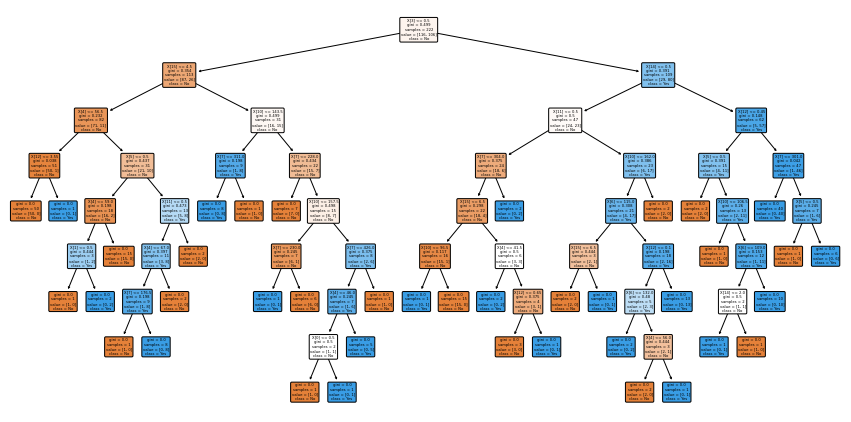

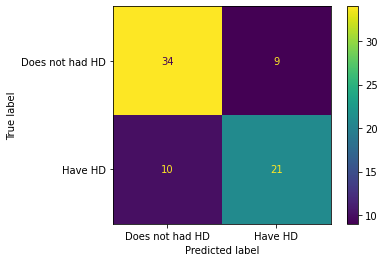

In [48]:
#Let's Test our tree
plot_confusion_matrix(clf_dt,X_test,Y_test,display_labels=['Does not had HD','Have HD'])

We see that out of **34+9=43** people that did not had Heart Disease, **34(79%)** were correctly classified. And out of 
**10+21=31** people that have Heart Disease, **21(67%)** were correctly classified.
Our Tree might be overfitting to our training data, So lets Prune our tree

In [49]:
clf_dt.score(X_test,Y_test)

0.7432432432432432

# Cost Complexity Pruning

Pruning a tree is all about finding the right value for the pruning parameter alpha

In [50]:
path=clf_dt.cost_complexity_pruning_path(X_train,Y_train)
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

clf_dts=[]
for ccp_alpha in ccp_alphas:
    cls_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    cls_dt.fit(X_train,Y_train)
    clf_dts.append(cls_dt)

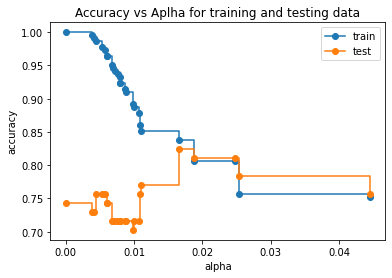

In [51]:
train_scores=[ clf_dt.score(X_train,Y_train) for clf_dt in clf_dts]
test_scores= [ clf_dt.score(X_test,Y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Aplha for training and testing data")
ax.plot(ccp_alphas,train_scores,marker="o",label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker="o",label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In the graph we see the accuracy for testing data is maximum at **alpha=0.016** and after that accuracy drops which tell us to set **ccp_aplha=0.016**

But the question here is, how do we know that we had the best **Training data** and **Testing data** as there are multiple ways to split them. Thus we will do a **5-Fold CrossValidation**, as we don't have much data.




# Cross Validation

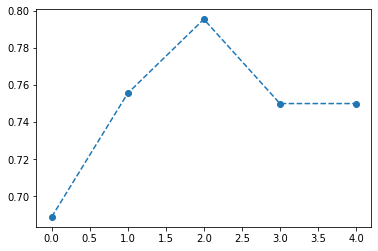

In [52]:
clf_dt= DecisionTreeClassifier(random_state=42,ccp_alpha=0.016)

scores=cross_val_score(clf_dt,X_train,Y_train,cv=5)
plt.plot([0,1,2,3,4],scores,marker='o',linestyle="--")
plt.show()

The above graph shows that how different Training and Testing data with same alpha results in varying accuracies. Thus we use cross validation to find the optimal value of alpha

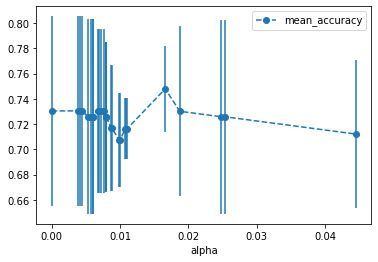

In [53]:
alpha_values=[]

for ccp_alpha in ccp_alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    scores=cross_val_score(clf_dt,X_train,Y_train,cv=5)
    alpha_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_result=pd.DataFrame(alpha_values,columns=["alpha","mean_accuracy","std"])
alpha_result.plot(x='alpha',y='mean_accuracy',yerr='std',marker="o",linestyle="--")
plt.show()

From above we see that the optimal alpha is somewhere between 0.015 and 0.02

In [54]:
alpha_result[(alpha_result['alpha']>0.015)
              &
              (alpha_result['alpha']<0.02)]['alpha']

22    0.016618
23    0.018742
Name: alpha, dtype: float64

In [55]:
# Thus the ideal alpha is 0.016618
ideal_alpha=00.016618

# Now lets Build the Final Classification Tree

In [56]:
clf_dt_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_alpha)
clf_dt_pruned=clf_dt_pruned.fit(X_train,Y_train)

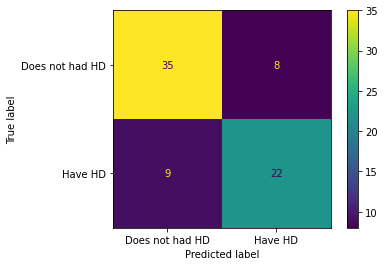

In [57]:
plot_confusion_matrix(clf_dt_pruned,X_test,Y_test,display_labels=['Does not had HD','Have HD'])

Hooray!! We see that the pruned tree is better at classifying than the full sized tree

Of the 35+8=43 people that did not had Heart Disease, **33(81.4 %)** were correctly classified which was earlier **79 %**. And out of 9+22=31 people that have Heart Disease, **22(71 %)** were correctly classified which was earlier **67 %**. Our Tree might be overfitting to our training data, So lets Prune our tree

In [58]:
clf_dt_pruned.score(X_test,Y_test)

0.7702702702702703

[Text(482.8846153846154, 489.24, 'X[3] <= 0.5\ngini = 0.499\nsamples = 222\nvalue = [116, 106]\nclass = No'),
 Text(257.53846153846155, 380.52000000000004, 'X[15] <= 4.5\ngini = 0.354\nsamples = 113\nvalue = [87, 26]\nclass = No'),
 Text(128.76923076923077, 271.8, 'X[4] <= 56.5\ngini = 0.232\nsamples = 82\nvalue = [71, 11]\nclass = No'),
 Text(64.38461538461539, 163.08000000000004, 'gini = 0.038\nsamples = 51\nvalue = [50, 1]\nclass = No'),
 Text(193.15384615384616, 163.08000000000004, 'X[5] <= 0.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]\nclass = No'),
 Text(128.76923076923077, 54.360000000000014, 'gini = 0.198\nsamples = 18\nvalue = [16, 2]\nclass = No'),
 Text(257.53846153846155, 54.360000000000014, 'gini = 0.473\nsamples = 13\nvalue = [5, 8]\nclass = Yes'),
 Text(386.3076923076923, 271.8, 'X[10] <= 143.5\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = No'),
 Text(321.9230769230769, 163.08000000000004, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = Yes'),
 Text(450.

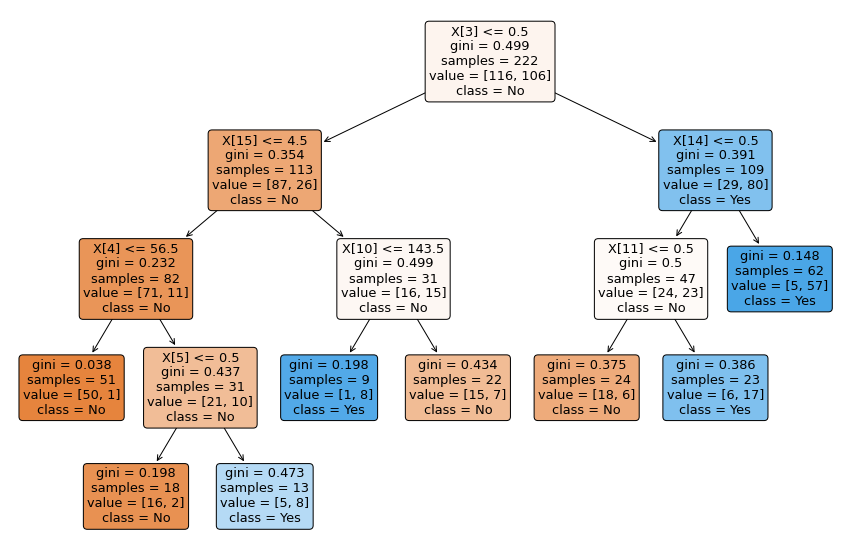

In [59]:
plt.figure(figsize=(15,10))
plot_tree(clf_dt_pruned,filled=True,rounded=True, class_names=['No','Yes'])